## **Part 1: CNN Autoencoder**

In [25]:
# Importing required libraries into the workspace
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam

In [31]:
# Loading and preprocessing data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [32]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [33]:
# Building the CNN autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [35]:
# Training the model
autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 454ms/step - loss: 0.2891 - val_loss: 0.0878
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 473ms/step - loss: 0.0858 - val_loss: 0.0791
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 458ms/step - loss: 0.0789 - val_loss: 0.0754
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 464ms/step - loss: 0.0756 - val_loss: 0.0737
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 464ms/step - loss: 0.0740 - val_loss: 0.0723
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 462ms/step - loss: 0.0728 - val_loss: 0.0716
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 462ms/step - loss: 0.0719 - val_loss: 0.0707
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 458ms/step - loss: 0.0712 - val_loss: 0.0702
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 467ms/step - loss: 0.0709 - val_loss: 0.0700
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 463ms/step - loss: 0.0703 - val_loss: 0.0692
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 465ms/step - loss: 0.0699 - val_loss: 0.0692
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


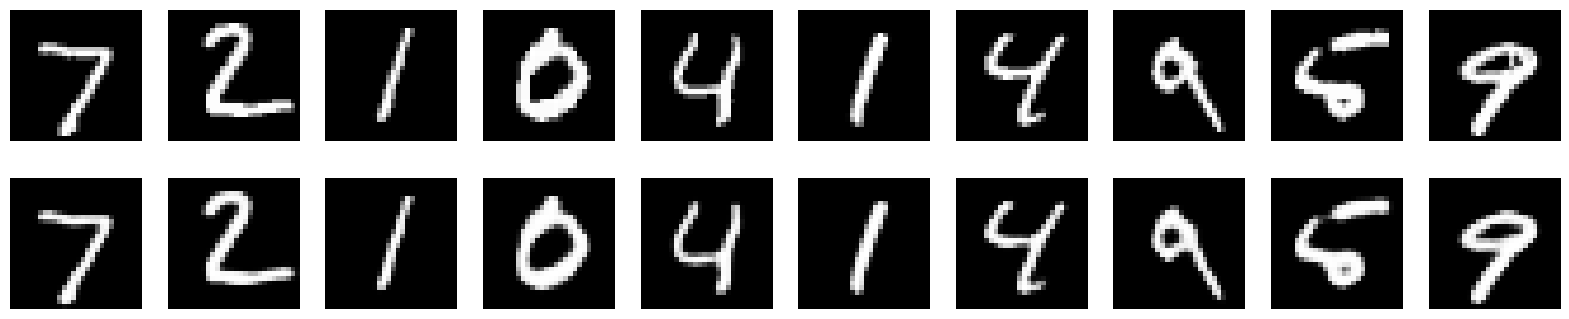

In [36]:
# Visualizing input and reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Displaying 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # Displaying reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()

In [37]:
# Evaluating MSE
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Mean Squared Error (MSE) for CNN Autoencoder: {mse}")

Mean Squared Error (MSE) for CNN Autoencoder: 0.001932239392772317


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


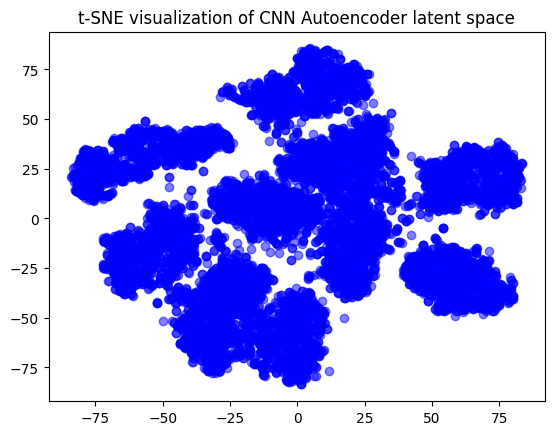

In [38]:
# Latent space visualization using t-SNE
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
encoded_imgs_flat = encoded_imgs.reshape(encoded_imgs.shape[0], -1)
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(encoded_imgs_flat)

plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE visualization of CNN Autoencoder latent space')
plt.show()

#### **Key Questions :-**

##### **1. How does the CNN autoencoder perform in reconstructing images?**
The CNN autoencoder generally performs well in reconstructing images, capturing primary spatial features but may lose some details due to compression.

##### **2. What insights do you gain from visualizing the latent space?**
The latent space visualization reveals clusters indicating compressed and meaningful feature extraction. This provides a lower-dimensional, yet informative, representation of the input data.

## **Part 2: LSTM Autoencoder**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

In [9]:
# Loading and preprocessing data
data = pd.read_csv('HistoricalQuotes.csv')

In [10]:
# Cleaning column names
data.columns = data.columns.str.strip()

In [11]:
# Preprocessing
data['Close/Last'] = data['Close/Last'].replace({'\$': ''}, regex=True).astype(float)
data['Open'] = data['Open'].replace({'\$': ''}, regex=True).astype(float)
data['High'] = data['High'].replace({'\$': ''}, regex=True).astype(float)
data['Low'] = data['Low'].replace({'\$': ''}, regex=True).astype(float)
data['Volume'] = data['Volume'].replace({',': ''}, regex=True).astype(int)

In [12]:
# Sorting data by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

In [13]:
# Selecting 'Close/Last' for input
time_series = data['Close/Last'].values.reshape(-1, 1)

In [14]:
# Normalizing the data
scaler = MinMaxScaler()
normalized_series = scaler.fit_transform(time_series)

In [15]:
# Preparing data for LSTM
timesteps = 10
X = []
for i in range(len(normalized_series) - timesteps):
    X.append(normalized_series[i:i + timesteps])
X = np.array(X)

# Splitting data
train_size = int(0.8 * len(X))
x_train, x_test = X[:train_size], X[train_size:]

In [16]:
# LSTM Autoencoder Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Training
history = model.fit(x_train, x_train, epochs=20, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0247 - val_loss: 0.0288
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 0.0164
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5221e-04 - val_loss: 0.0351
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.1649e-05 - val_loss: 0.0188
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.5633e-05 - val_loss: 0.0150
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0423e-05 - val_loss: 0.0104
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9055e-05 - val_loss: 0.0086
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6507e-05 - val_loss: 0.0074
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5374e-05 - val_loss: 0.0071
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.4372e-05 - val_loss: 0.0059
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2919e-05 - val_loss: 0.0057
Epoch 12/20
63/63 ━━━━━━━━

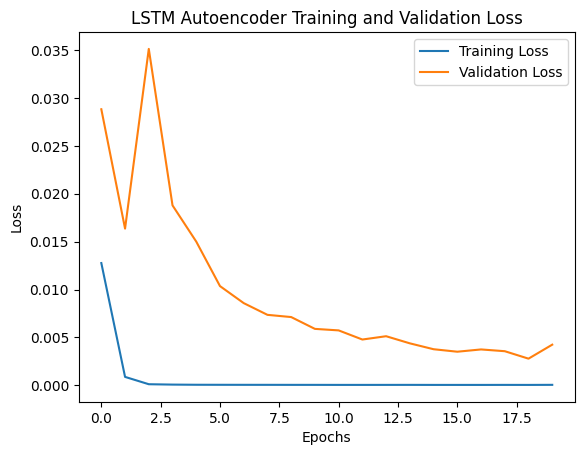

In [18]:
# Plotting Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Reconstructing sequences
reconstructed = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [20]:
# Calculating MSE
mse = np.mean(np.square(x_test - reconstructed))
print(f"Mean Squared Error (MSE) for LSTM Autoencoder: {mse}")

Mean Squared Error (MSE) for LSTM Autoencoder: 0.004240685145543836


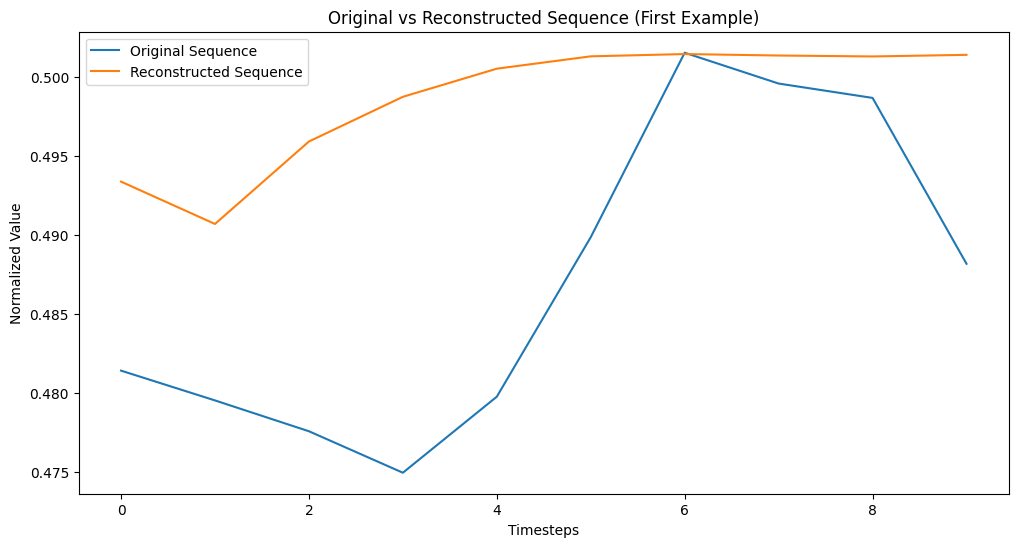

In [21]:
# Plotting original vs reconstructed sequences
plt.figure(figsize=(12, 6))
plt.plot(x_test[0].reshape(-1), label='Original Sequence')
plt.plot(reconstructed[0].reshape(-1), label='Reconstructed Sequence')
plt.title('Original vs Reconstructed Sequence (First Example)')
plt.xlabel('Timesteps')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

<ipython-input-24-841c7593b1a0>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


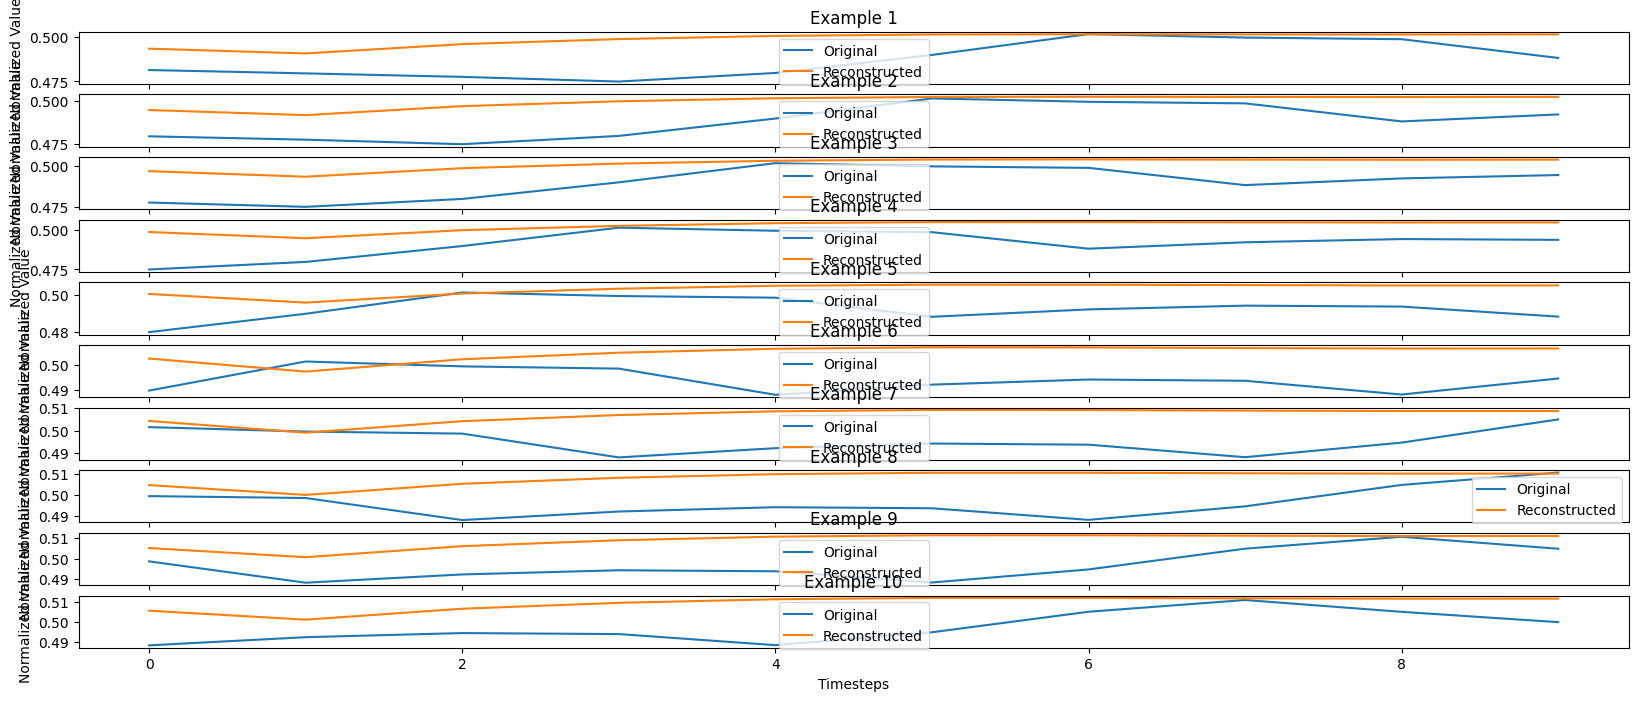

In [24]:
# Visualizing several examples
n_examples = 10
plt.figure(figsize=(20, 8))
for i in range(n_examples):
    plt.subplot(n_examples, 1, i + 1)
    plt.plot(x_test[i].reshape(-1), label='Original')
    plt.plot(reconstructed[i].reshape(-1), label='Reconstructed')
    plt.title(f'Example {i + 1}')
    plt.xlabel('Timesteps')
    plt.ylabel('Normalized Value')
    plt.legend()
plt.tight_layout()
plt.show()

#### **Key Questions :-**

##### **1. How well does the LSTM autoencoder reconstruct the sequences?**
The LSTM autoencoder effectively captures temporal dependencies and reconstructs sequences with reasonable accuracy, as indicated by low reconstruction loss.

##### **2. How does the choice of latent space dimensionality affect reconstruction quality and compression?**
Larger latent space dimensionality improves reconstruction quality but reduces compression efficiency, while smaller dimensionality increases compression but may degrade reconstruction fidelity. Balancing is crucial based on use case requirements.